## IS53051A: Machine Learning (2022-23) Coursework




**Team Lead: Sandor Kanda**  Student ID:  
**Team Member:Carlos Alves** Student ID:                  


Potential improvements of the ML modelling
After a cycle of data preprocessing and model training/ tuning, the Machine Learning engineer / analyst can return at different stages of the ML process to make improvements if needed, and redo the process.

For instance: (a) Dropping some features which have close to 0 correlations with the outcome. (b) And/or choosing the best features - with the highest importance from the random forest model.

These operations are called Feature selection. Feature selection is very useful especially when the dataset has a large number of variables (not the case here), or we use algos that are sensitive to features which are not predictive, as it is the case of k-Nearest Neighbour.

## I. Data inspection and visualisation

In [96]:
%matplotlib inline

### a. Loading the data and  Renaming Columns

In [97]:
import pandas as pd

# load the dataset
dataset = pd.read_csv('datcw_na.csv')
# change the column names to actual variable names
dataset = dataset.rename(columns={ 'X0': 'Category of the Building',
                         'X1': 'Relative Compactness',
                         'X2': 'Surface Area',
                         'X3': 'Wall Area',
                         'X4': 'Roof Area',
                         'X5': 'Overall Height',
                         'X6': 'Orientation',
                         'X7': 'Glazing Area',
                         'X8': 'Glazing Area Distribution',
                         'Y':  'Heating Load'})

### b. Inspecting the data structure

In [98]:
dataset

,Category of the Building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.00,0.00,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.00,0.00,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.00,0.00,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.00,0.00,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.00,0.00,20.84
...,...,...,...,...,...,...,...,...,...,...
763,C3,0.52,948.64,277.83,218.30,4.24,4.95,0.48,4.05,17.88
764,C2,0.50,727.65,NaN,266.80,3.47,1.98,0.44,5.00,16.54
765,C1,0.68,889.35,404.25,178.60,3.47,2.43,0.40,4.95,16.44
766,C3,0.50,654.88,363.82,218.30,3.15,3.96,0.36,4.50,16.48


In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category of the Building   768 non-null    object 
 1   Relative Compactness       768 non-null    float64
 2   Surface Area               768 non-null    float64
 3   Wall Area                  728 non-null    float64
 4   Roof Area                  768 non-null    float64
 5   Overall Height             768 non-null    float64
 6   Orientation                768 non-null    float64
 7   Glazing Area               768 non-null    float64
 8   Glazing Area Distribution  768 non-null    float64
 9   Heating Load               768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


In [100]:
dataset.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
count,768.000000,768.000000,728.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.763516,666.768997,321.102527,176.564141,5.229766,3.527331,0.237852,2.803737,22.307201
std,0.147093,120.863329,60.479340,51.280618,1.844813,1.245710,0.139736,1.597817,10.090196
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.650000,575.510000,277.830000,132.300000,3.470000,2.427500,0.100000,1.517500,12.992500
50%,0.750000,661.500000,315.320000,178.235000,4.955000,3.600000,0.240000,2.970000,18.950000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.425000,0.360000,3.960000,31.667500
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


#### It is noticable, that "Category of the Building" is a categorical variable, and the datatype is object, opposed to the rest of the columns: float64

In [101]:
dataset["Category of the Building"].value_counts()

C2    265
C3    260
C1    243
Name: Category of the Building, dtype: int64

### c. Visualising the data

#### Histogram of the full data frame

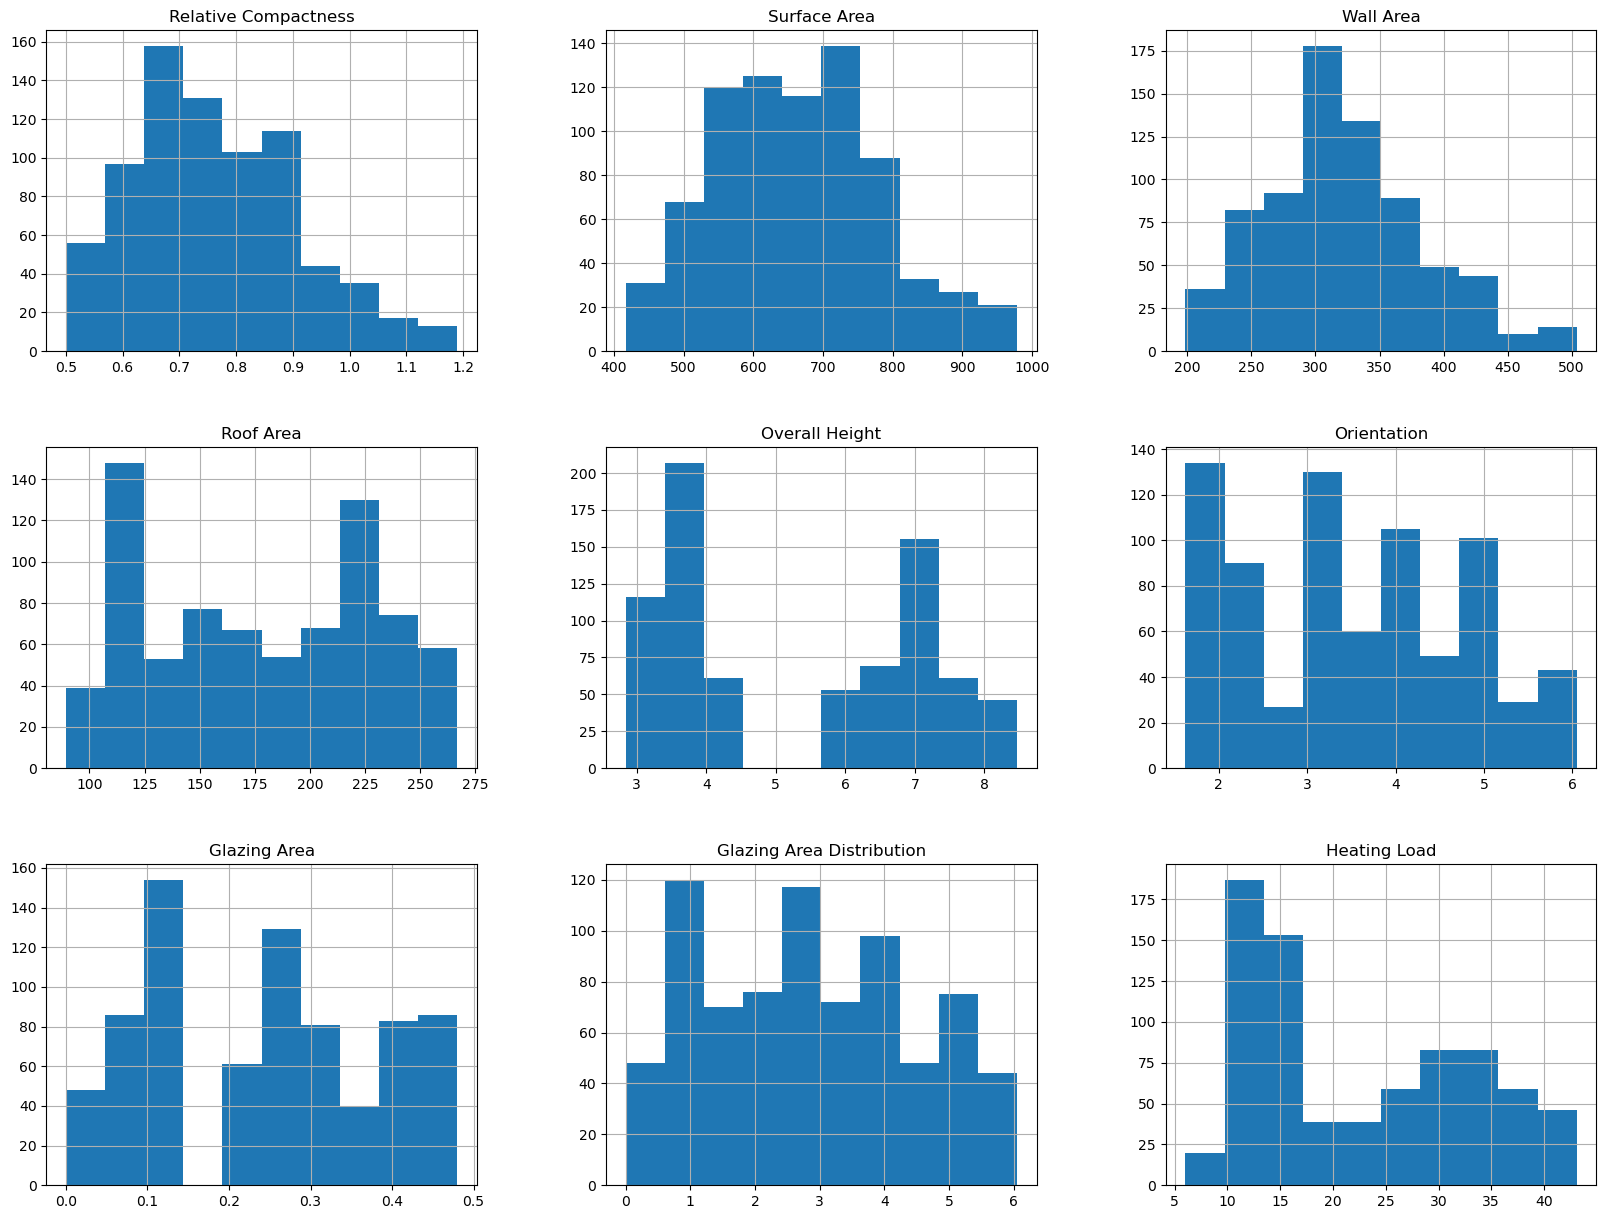

In [102]:
import matplotlib.pyplot as plt
dataset.hist(bins=10, figsize=(20,15))
plt.show()

<AxesSubplot: >

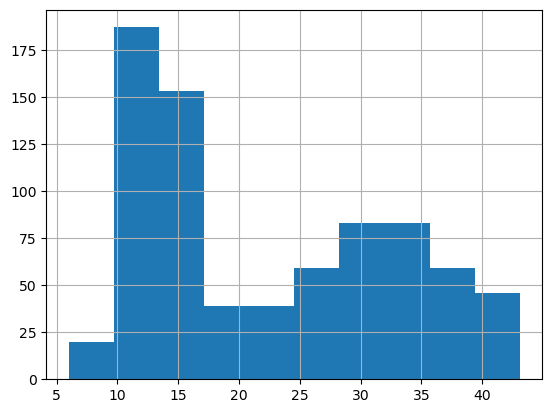

In [103]:
dataset['Heating Load'].hist()

#### Scattered Matrix of the full data frame

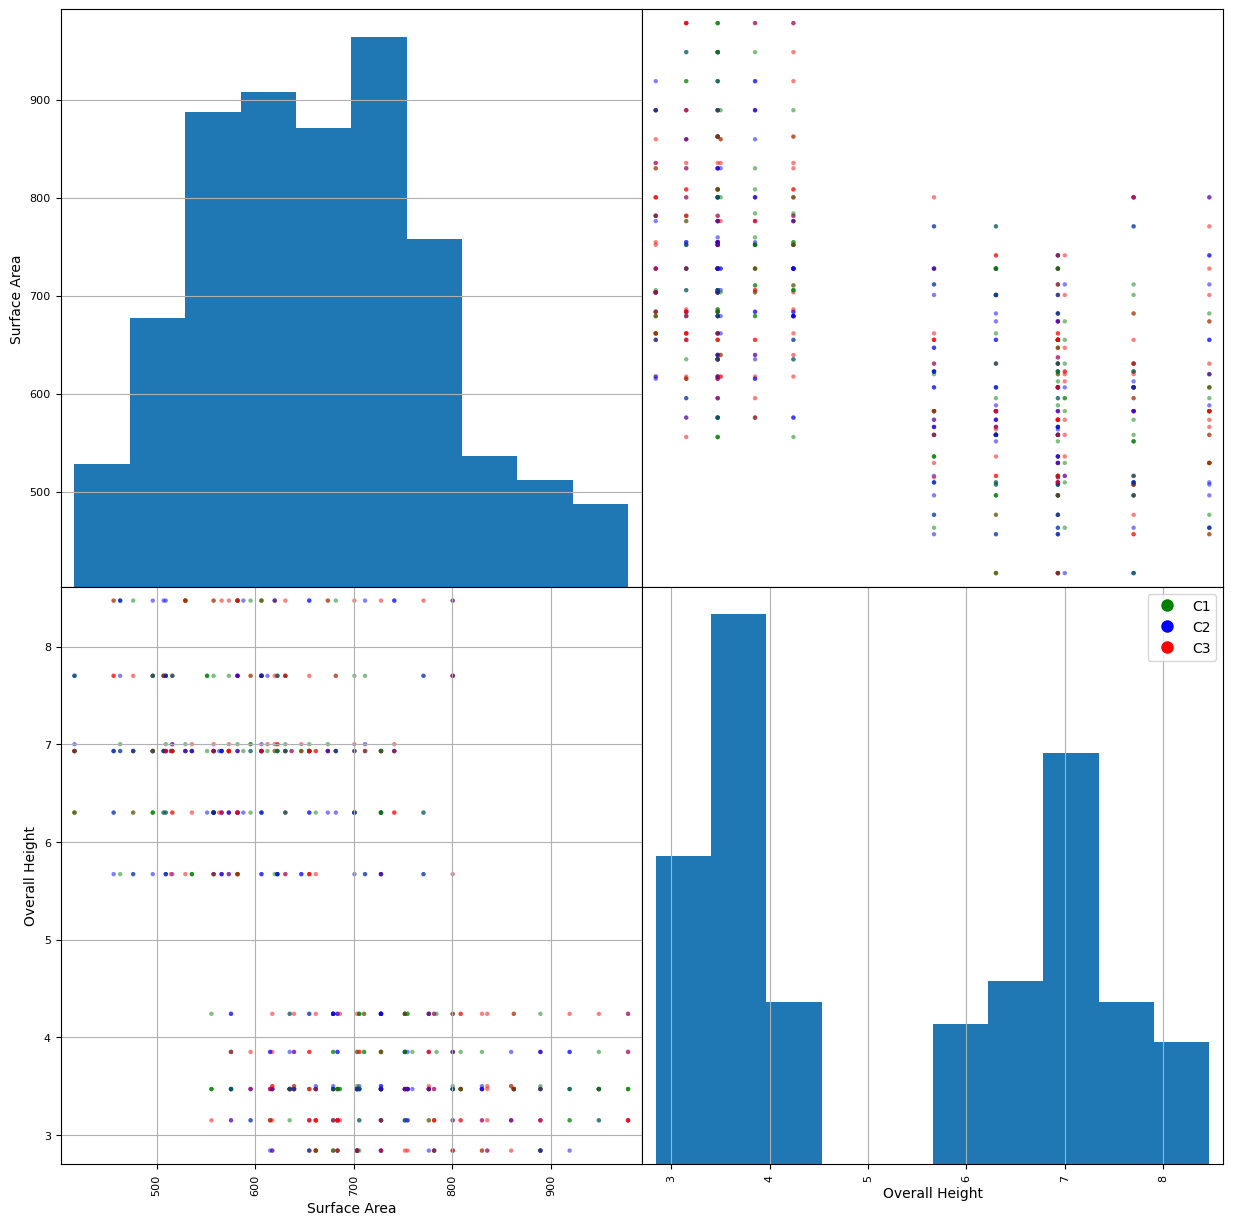

In [104]:
from pandas.plotting import scatter_matrix
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt

# "Overall Height", "Glazing Area","Glazing Area Distribution", "Orientation",
attributes = ["Surface Area", "Overall Height", "Category of the Building"]

# select the attributes and map the stage colors
X = dataset[attributes]
cm = {'C1': 'green', 'C2': 'blue', 'C3': 'red'}
colors = X['Category of the Building'].map(cm)

# create a numpy array of RGBA color tuples for each data point
rgba_colors = [to_rgba(c) for c in colors]

# create a scatter matrix with smaller font size and smaller dots
plt.rcParams.update({'font.size': 10})
scatter_matrix(X, figsize=(15, 15), color=rgba_colors, s=40, grid=True)

# create a legend based on the colors and categories
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key,
                          markerfacecolor=value, markersize=10) for key, value in cm.items()]

plt.legend(handles=legend_elements, loc='upper right')
# add grid to each subplot
for ax in plt.gcf().axes:
    ax.grid(True)
    
plt.show()


array([[<AxesSubplot: title={'center': 'Overall Height'}>,
        <AxesSubplot: title={'center': 'Heating Load'}>]], dtype=object)

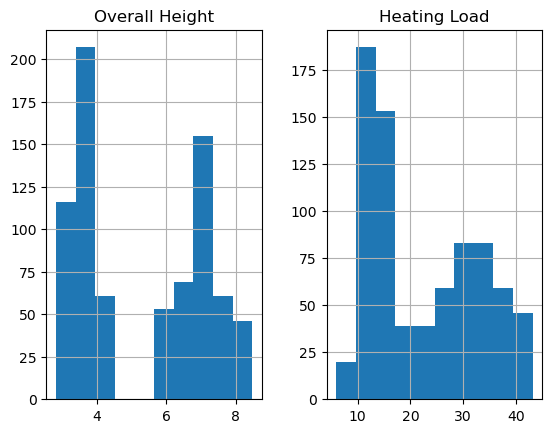

In [105]:
dataset[['Overall Height', 'Heating Load']].hist()


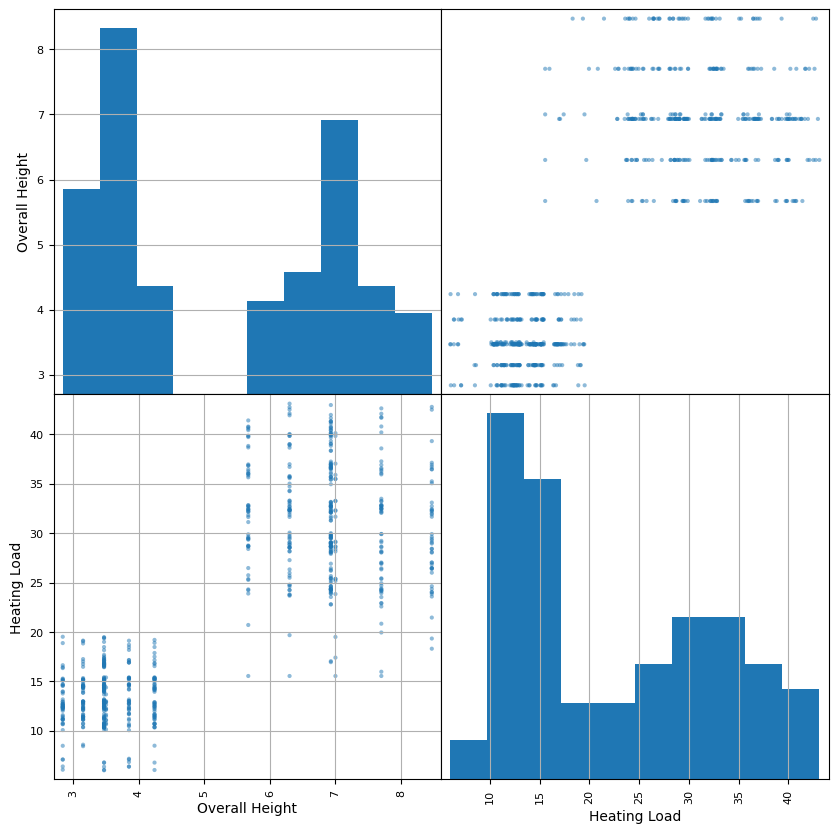

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

axes = scatter_matrix(dataset[['Overall Height', 'Heating Load']], figsize=(10, 10), diagonal='hist')

# Add grids to each subplot
for ax in axes.flatten():
    ax.grid()

# Show the plot
plt.show()


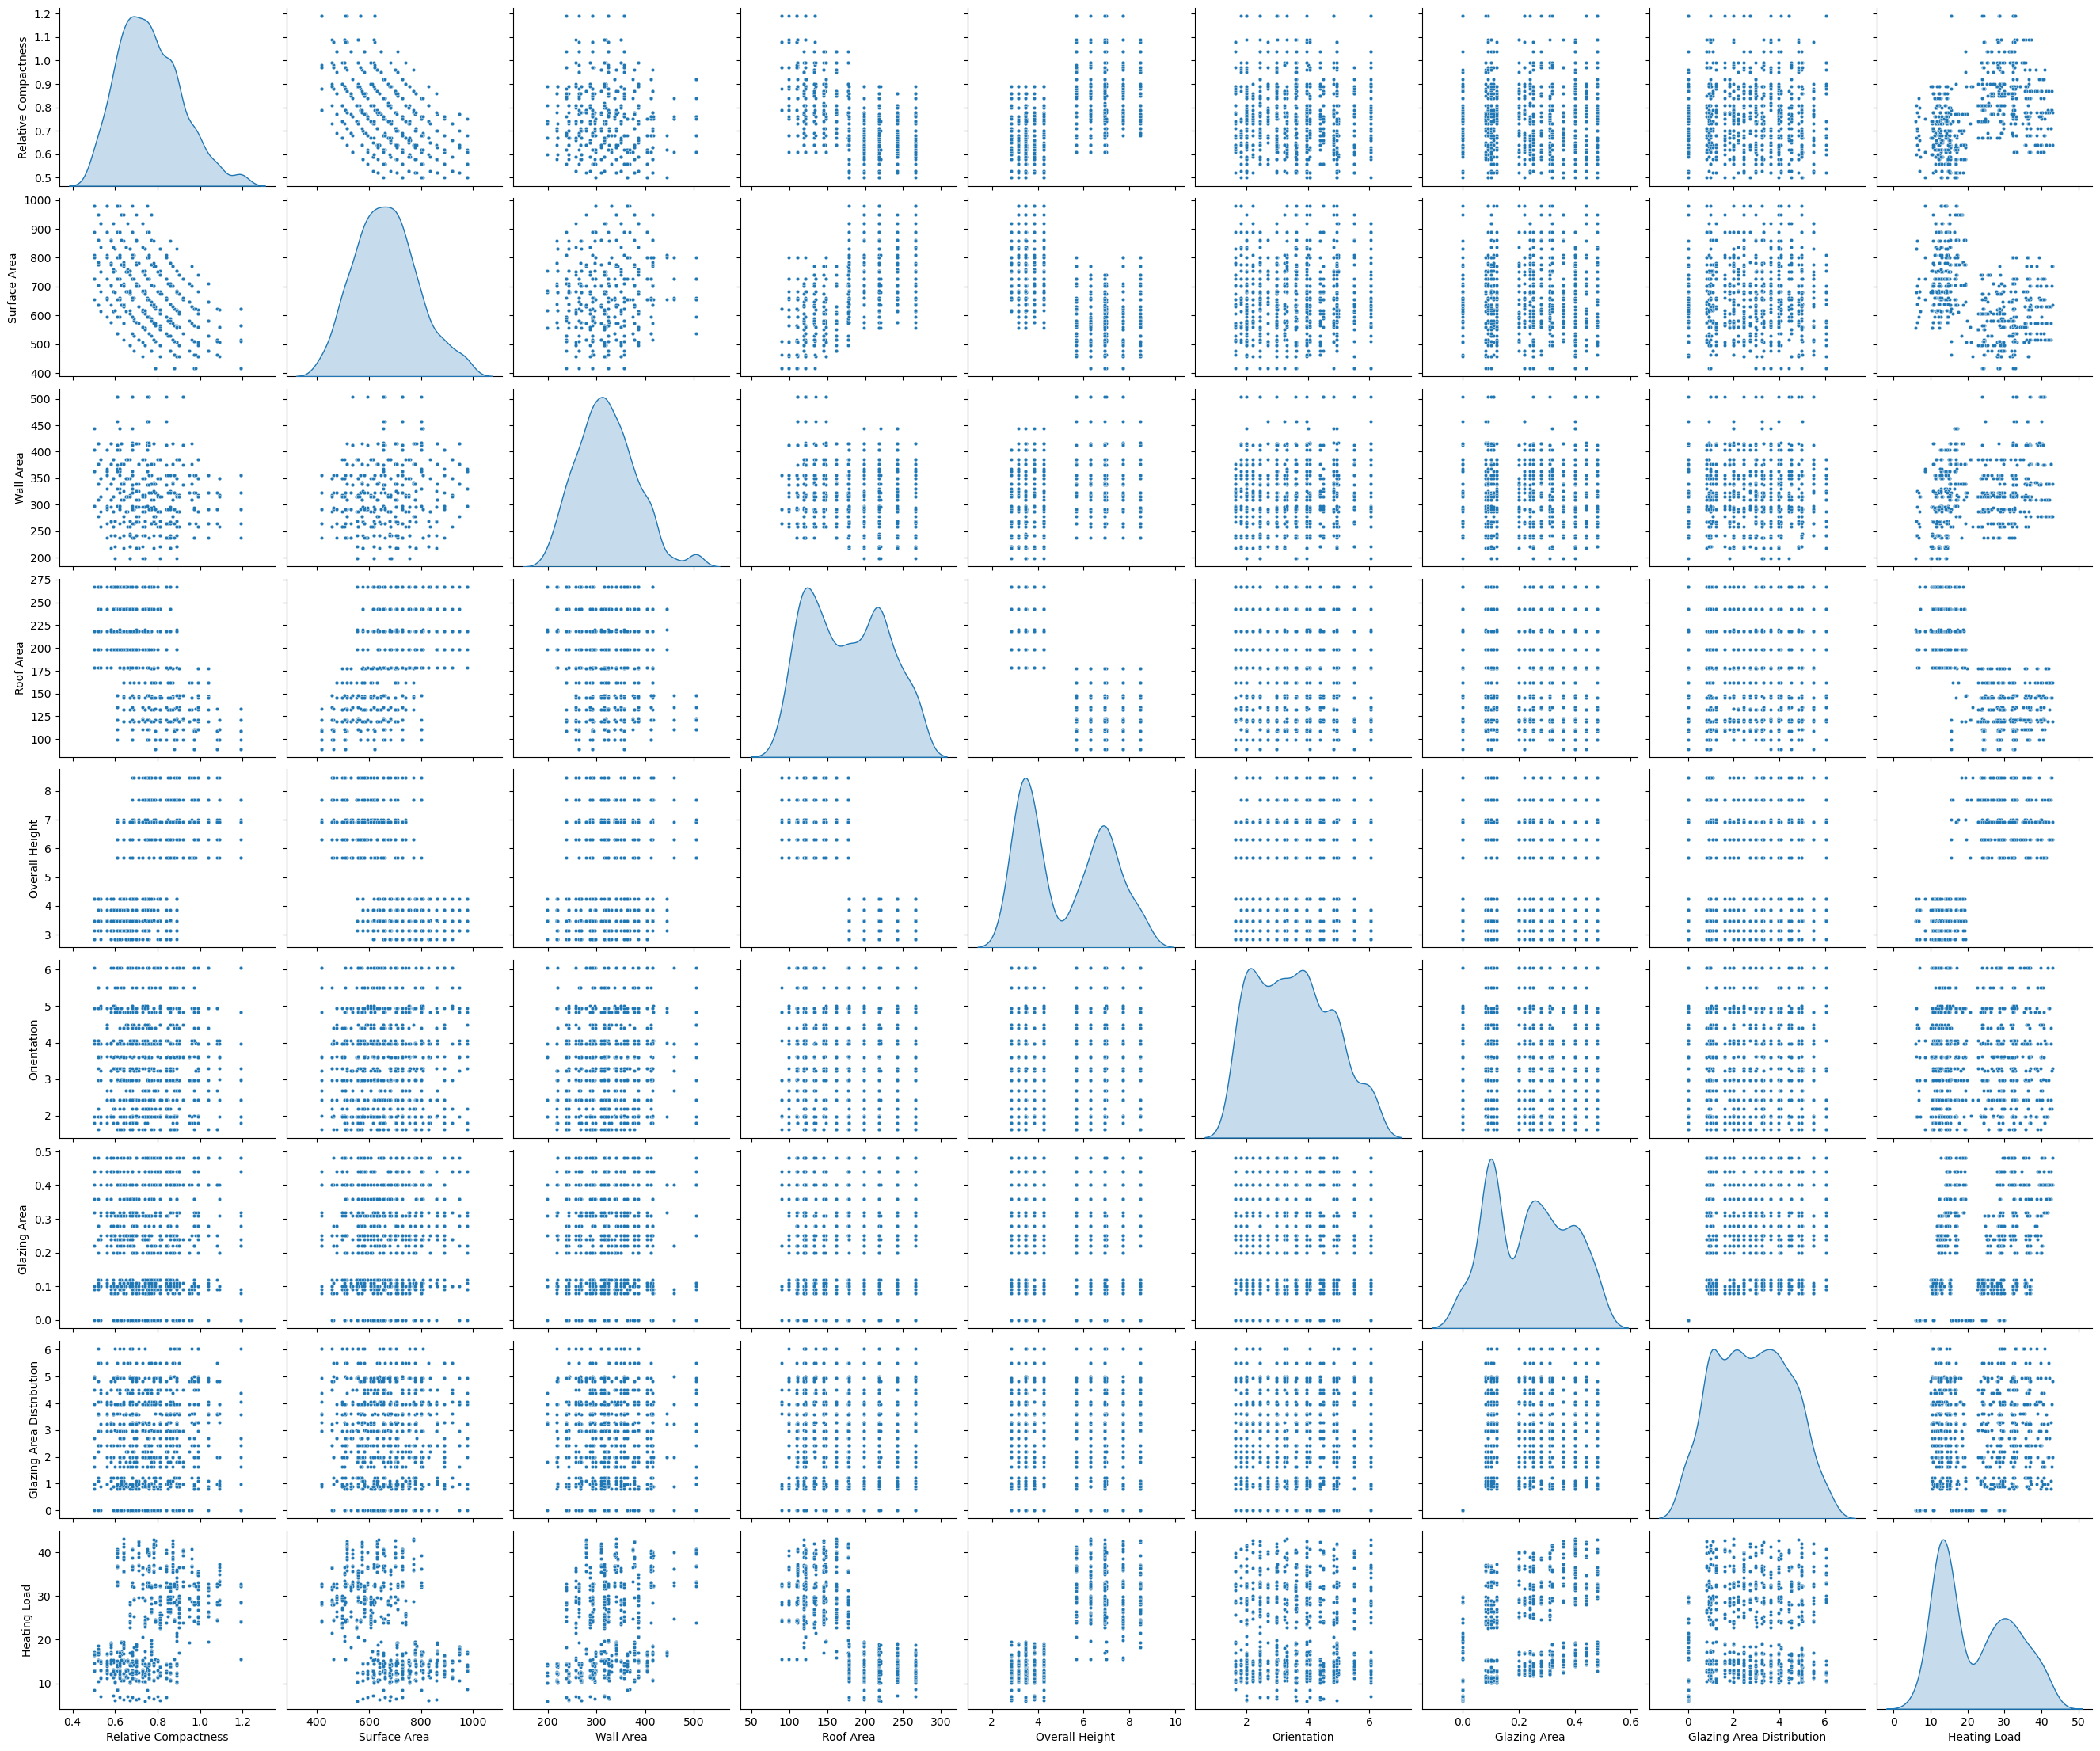

In [107]:
import seaborn as sns

sns.pairplot(dataset, height=2.5, aspect=1.2, diag_kind='kde', plot_kws=dict(s=10), diag_kws=dict(fill=True))

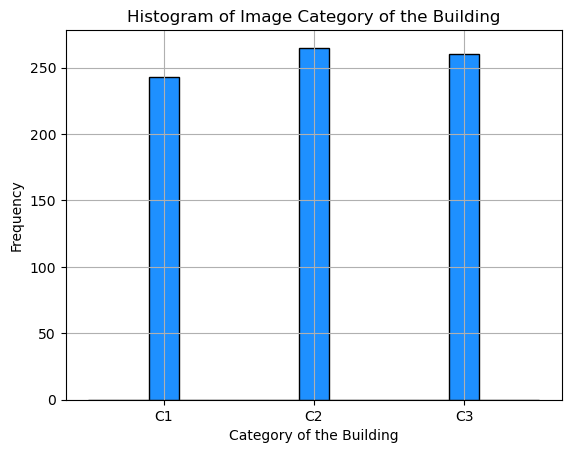

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the order of the categories
category_order = ['C1', 'C2', 'C3']

# Group the data by category
groups = dataset.groupby('Category of the Building')

# Create a histogram for each category in the specified order
for category in category_order:
    group = groups.get_group(category)
    plt.hist(group['Category of the Building'], bins=5, color='dodgerblue', edgecolor='black', label=category)

# Add grids to the plot
plt.grid(True)

# Add labels and a title to the plot
plt.xlabel('Category of the Building')
plt.ylabel('Frequency')
plt.title('Histogram of Image Category of the Building')



# Show the plot
plt.show()


## II. Data pre-processing

### a. Creating Test Set

In [109]:
import numpy as np

# to make this notebook's output identical at every run
np.random.seed(42)

In [110]:
# split the data into train and test sets, for model training and evaluation, respectively
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

### c. Looking For Correlations

In [111]:
correlationMatrix = dataset.corr()
print(correlationMatrix.columns)

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load'],
      dtype='object')


/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_13167/879598923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = dataset.corr()


In [112]:
correlationMatrix["Heating Load"].sort_values(ascending=False)

Heating Load                 1.000000
Overall Height               0.815769
Relative Compactness         0.454177
Wall Area                    0.312449
Glazing Area                 0.255901
Glazing Area Distribution    0.087106
Orientation                  0.001340
Surface Area                -0.481192
Roof Area                   -0.771040
Name: Heating Load, dtype: float64

#### Looking to compare the strenghts of the correlation with the absolute values instead

In [113]:
correlationMatrix = abs(correlationMatrix["Heating Load"])
correlationMatrix_sorted = correlationMatrix.sort_values(ascending=False)
print(correlationMatrix_sorted)


Heating Load                 1.000000
Overall Height               0.815769
Roof Area                    0.771040
Surface Area                 0.481192
Relative Compactness         0.454177
Wall Area                    0.312449
Glazing Area                 0.255901
Glazing Area Distribution    0.087106
Orientation                  0.001340
Name: Heating Load, dtype: float64


Is it worth dropping Glazing Area Distribution and/or Orientation?        

In [114]:
dataset = train_set.drop("Heating Load", axis=1) 
dataset_labels =train_set["Heating Load"].copy()

### Data Cleaning

### c. Missing Values

In [115]:
# Checking the data with missing values.
sample_incomplete_rows = dataset[dataset.isnull().any(axis=1)].head() 
sample_incomplete_rows


,Category of the Building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
608,C1,0.68,808.50,NaN,266.80,3.85,2.20,0.36,1.62
432,C1,1.19,622.55,NaN,109.15,5.67,1.98,0.22,4.40
395,C1,0.69,476.28,NaN,145.53,6.93,4.50,0.22,2.70
333,C1,0.68,727.65,NaN,242.55,3.47,2.70,0.20,0.99
417,C1,0.84,727.65,NaN,266.80,3.85,2.97,0.25,3.63


In [116]:
missing_values= dataset.isnull().sum()
print(missing_values)

Category of the Building      0
Relative Compactness          0
Surface Area                  0
Wall Area                    29
Roof Area                     0
Overall Height                0
Orientation                   0
Glazing Area                  0
Glazing Area Distribution     0
dtype: int64


How to justify why median is a good way to go about this?

Computing median and impute (fill in with median) the missing values.

In [117]:
median = dataset["Wall Area"].median()
sample_incomplete_rows["Wall Area"].fillna(median, inplace=True)

In [118]:
sample_incomplete_rows

,Category of the Building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
608,C1,0.68,808.50,315.32,266.80,3.85,2.20,0.36,1.62
432,C1,1.19,622.55,315.32,109.15,5.67,1.98,0.22,4.40
395,C1,0.69,476.28,315.32,145.53,6.93,4.50,0.22,2.70
333,C1,0.68,727.65,315.32,242.55,3.47,2.70,0.20,0.99
417,C1,0.84,727.65,315.32,266.80,3.85,2.97,0.25,3.63


In [119]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [120]:
dataset_num = dataset.drop("Category of the Building", axis=1)

In [121]:
imputer.fit(dataset_num)

SimpleImputer(strategy='median')

In [122]:
X = imputer.transform(dataset_num)

In [123]:
dataset_tr = pd.DataFrame(X, columns=dataset_num.columns,index=dataset.index)

In [124]:
dataset_tr.loc[sample_incomplete_rows.index.values]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
608,0.68,808.50,315.32,266.80,3.85,2.20,0.36,1.62
432,1.19,622.55,315.32,109.15,5.67,1.98,0.22,4.40
395,0.69,476.28,315.32,145.53,6.93,4.50,0.22,2.70
333,0.68,727.65,315.32,242.55,3.47,2.70,0.20,0.99
417,0.84,727.65,315.32,266.80,3.85,2.97,0.25,3.63


In [125]:
imputer.strategy

'median'

In [126]:
dataset_tr.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
60,0.81,496.12,286.65,145.53,7.70,2.00,0.09,0.99
618,0.64,635.04,339.57,266.80,4.24,3.60,0.32,2.00
346,0.69,582.12,264.60,161.70,8.47,3.24,0.25,1.80
294,0.73,681.84,385.39,121.28,7.70,3.96,0.24,0.90
231,0.66,683.55,315.32,198.45,3.15,4.50,0.11,4.40


### d. Handling Categorical Atributes

In [127]:
dataset_Categorical = dataset[["Category of the Building"]]
dataset_Categorical.head()

,Category of the Building
60,C1
618,C1
346,C1
294,C1
231,C3


Justify why One-Hot Encoding is suitable here

### Using One-Hot Encoding, as the categorical values are not ordinal.

In [128]:
from sklearn.preprocessing import OneHotEncoder

category_encoder = OneHotEncoder()
dataset_Categorical_1Hot = category_encoder.fit_transform(dataset_Categorical)
dataset_Categorical_1Hot

<614x3 sparse matrix of type '<class 'numpy.float64'>'
	with 614 stored elements in Compressed Sparse Row format>

In [129]:
dataset_Categorical_1Hot.shape

(614, 3)

In [130]:
dataset_Categorical_1Hot.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Transformation Pipeline

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

dataset_num_tr = num_pipeline.fit_transform(dataset_num)

In [132]:
dataset_num_tr

array([[ 0.32633614, -1.40887782, -0.58523907, ..., -1.25587004,
        -1.05722443, -1.12189101],
       [-0.81710012, -0.26910413,  0.31254773, ...,  0.0523196 ,
         0.57913281, -0.49344882],
       [-0.48079534, -0.70328801, -0.95931691, ..., -0.24202307,
         0.08111104, -0.61789282],
       ...,
       [ 0.66264092, -0.75751997,  0.08402943, ...,  1.06616657,
        -0.84378653,  2.02654212],
       [ 1.40251144, -1.30024981,  0.58687147, ...,  2.05548498,
         0.50798684,  0.27810396],
       [ 1.53703336, -0.90232997, -1.07162508, ...,  0.34666226,
        -1.1283704 , -0.36900483]])

In [133]:
from sklearn.compose import ColumnTransformer
import pandas as pd

num_attribs = list(dataset_num)
cat_attribs = ["Category of the Building"]
y_train = train_set['Heating Load']
train_set.drop('Heating Load',inplace=True, axis=1)


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

train_dataset_prepared = full_pipeline.fit_transform(train_set)

In [134]:
train_set

,Category of the Building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
60,C1,0.81,496.12,286.65,145.53,7.70,2.00,0.09,0.99
618,C1,0.64,635.04,339.57,266.80,4.24,3.60,0.32,2.00
346,C1,0.69,582.12,264.60,161.70,8.47,3.24,0.25,1.80
294,C1,0.73,681.84,385.39,121.28,7.70,3.96,0.24,0.90
231,C3,0.66,683.55,315.32,198.45,3.15,4.50,0.11,4.40
...,...,...,...,...,...,...,...,...,...
71,C2,0.75,654.89,416.50,121.28,8.47,4.05,0.09,0.90
106,C2,1.04,582.12,291.06,161.70,7.70,3.96,0.09,2.42
270,C2,0.86,575.51,326.10,242.55,3.47,4.84,0.12,6.05
435,C2,0.97,509.36,355.74,109.15,6.93,6.05,0.31,3.24


In [135]:
train_dataset_prepared

array([[ 0.32633614, -1.40887782, -0.58523907, ...,  1.        ,
         0.        ,  0.        ],
       [-0.81710012, -0.26910413,  0.31254773, ...,  1.        ,
         0.        ,  0.        ],
       [-0.48079534, -0.70328801, -0.95931691, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.66264092, -0.75751997,  0.08402943, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.40251144, -1.30024981,  0.58687147, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.53703336, -0.90232997, -1.07162508, ...,  0.        ,
         0.        ,  1.        ]])

run the pipeline with test, call transform, to get the transformed test dataset

In [136]:
num_attribs

['Relative Compactness',
 'Surface Area',
 'Wall Area',
 'Roof Area',
 'Overall Height',
 'Orientation',
 'Glazing Area',
 'Glazing Area Distribution']

In [137]:
cat_attribs

['Category of the Building']

In [138]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

## III. Models training and optimisation

### a. Simple Linear Regression

In [139]:
# fitting a simple linear regression to predict Heating Load

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_dataset_prepared, dataset_labels)

LinearRegression()

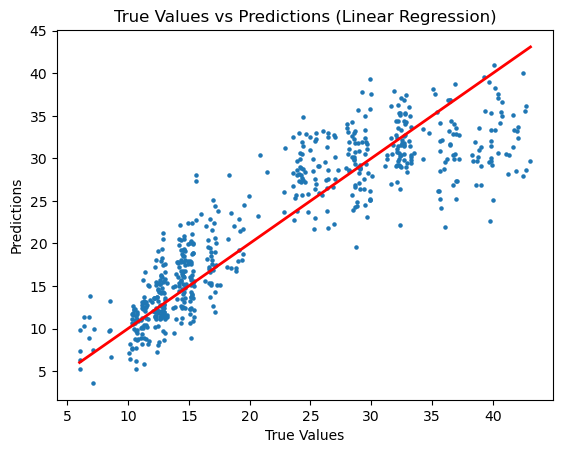

In [140]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fit the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(train_dataset_prepared, y_train)  # Use the correct variable for training labels

# Make predictions
predictions = lin_reg.predict(train_dataset_prepared)


# Create a scatter plot comparing true values with predicted values
plt.scatter(y_train, predictions, s=5)  # Set the marker size to a smaller value
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Linear Regression)")

# Add a reference line for better visualization
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

plt.show()


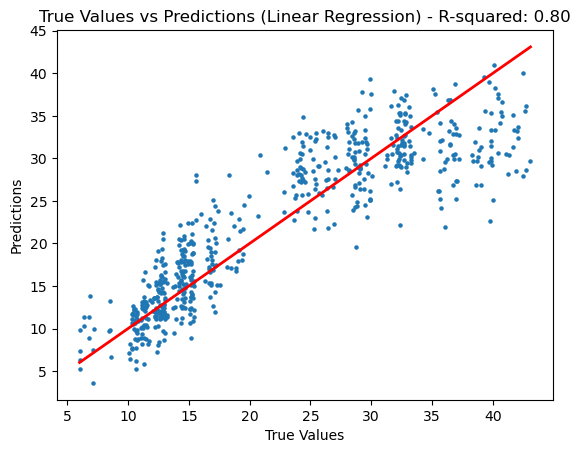

In [141]:
from sklearn.metrics import r2_score


# Fit the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(train_dataset_prepared, y_train)

# Make predictions
predictions = lin_reg.predict(train_dataset_prepared)

# Calculate R-squared score
r2 = r2_score(y_train, predictions)

# Create a scatter plot comparing true values with predicted values
plt.scatter(y_train, predictions, s=5)  # Set the marker size to a smaller value
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Linear Regression) - R-squared: {:.2f}".format(r2))

# Add a reference line for better visualization
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

plt.show()


### Comparism over the actual files

In [142]:
print("Labels:", list(y_train))

Labels: [23.53, 18.9, 29.27, 32.84, 11.43, 32.46, 35.96, 39.86, 16.94, 15.42, 16.84, 15.16, 24.17, 32.12, 32.31, 11.49, 8.6, 32.94, 10.47, 32.67, 12.8, 41.26, 11.43, 14.19, 33.28, 32.52, 6.37, 14.75, 35.69, 14.17, 32.68, 15.41, 28.7, 14.5, 12.63, 42.74, 20.71, 15.3, 36.28, 10.43, 38.57, 39.83, 24.4, 12.18, 28.41, 11.45, 14.58, 34.29, 16.77, 29.07, 10.54, 29.67, 23.75, 28.58, 26.28, 12.72, 28.05, 14.92, 15.09, 32.26, 6.07, 12.95, 29.02, 29.88, 24.94, 13.18, 23.67, 11.09, 24.59, 38.84, 18.16, 14.66, 19.12, 28.86, 32.09, 17.35, 26.97, 15.08, 15.19, 32.31, 41.67, 29.63, 43.1, 12.88, 13.17, 10.34, 32.23, 11.16, 24.03, 31.28, 29.92, 6.4, 15.16, 40.42, 14.6, 36.43, 14.34, 11.53, 32.13, 36.57, 12.91, 10.72, 29.4, 16.48, 19.48, 16.74, 12.41, 14.21, 11.22, 13.99, 15.12, 36.7, 27.03, 32.15, 10.36, 33.28, 42.08, 26.48, 36.97, 12.63, 12.96, 14.34, 15.2, 12.46, 14.61, 19.13, 14.71, 11.64, 18.31, 10.56, 10.77, 33.24, 32.74, 18.48, 14.66, 11.1, 14.62, 12.78, 11.16, 36.47, 31.29, 36.71, 19.2, 29.47, 15

### Mean Squared Error on Linear Regression

In [143]:
# let's see what rmse error the linear regression achieves on the training set

from sklearn.metrics import mean_squared_error

dataset_predictions = lin_reg.predict(train_dataset_prepared)
lin_mse = mean_squared_error(dataset_labels, dataset_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.479581032349324

In [144]:
# onother useful error is mean absolute error 
# (useful to consider when you suspect outliers in data as it's more robust to outliers than rmse)
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(dataset_labels, dataset_predictions)
lin_mae

3.4039522565248106

In [145]:
# onother useful error is mean absolute error 
# (useful to consider when you suspect outliers in data as it's more robust to outliers than rmse)

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(dataset_labels, dataset_predictions)
lin_mae

3.4039522565248106

### b. Nearest Neighbour

In [146]:
from sklearn.neighbors import KNeighborsRegressor
neigh_reg = KNeighborsRegressor(n_neighbors=1)
neigh_reg.fit(train_dataset_prepared, y_train)

KNeighborsRegressor(n_neighbors=1)

In [147]:
dataset_predictions = neigh_reg.predict(train_dataset_prepared)
neigh_mse = mean_squared_error(dataset_labels, dataset_predictions)
neigh_rmse = np.sqrt(neigh_mse)
neigh_rmse

0.0

### Simple Random Forest 

In [148]:
# fitting a simple random forest model consisting of an ensemble of 100 trees (n_estimators) 
# whose predictions are averaged by the random forest model;
# ensemble models, in particular random forests, are powerful as they combine the results produced by several models

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_dataset_prepared, y_train)

RandomForestRegressor(random_state=42)

### Simple Decision Tree

In [149]:
# fitting a simple decision tree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_dataset_prepared, y_train)

DecisionTreeRegressor(random_state=42)

### RMSE Error 

In [150]:
# let's see what rmse error the decision tree achieves on training set;
# this is a powerful model which can capture non-linear patterns in the data
# and here clearly overfits the training set because of the error = 0

dataset_predictions = tree_reg.predict(train_dataset_prepared)
tree_mse = mean_squared_error(dataset_labels, dataset_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.4833426646359933e-16

In [151]:
# # first define a function to display (error) scores in a CV, on all test folds, and their average and standard deviation

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Linear Regression - Cross Validation

Scores: [4.26076237 4.486255   4.35035707 4.64598555 5.05269841 4.83855601
 4.1490298  4.82328685 5.26003433 3.64560422]
Mean: 4.551256960790047
Standard deviation: 0.4505874056902117


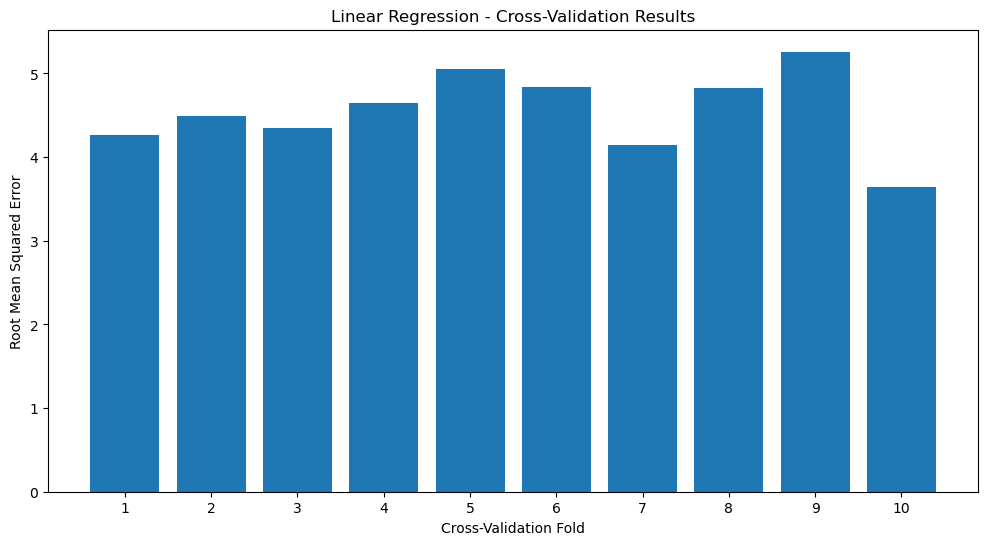

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


lin_scores = cross_val_score(lin_reg, train_dataset_prepared, dataset_labels,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

# Plotting the RMSE for each cross-validation fold
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(lin_rmse_scores) + 1), lin_rmse_scores)
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Root Mean Squared Error')
plt.title('Linear Regression - Cross-Validation Results')
plt.xticks(range(1, len(lin_rmse_scores) + 1))
plt.show()


### Random Forest Tuning with Grid Search  <br> ****** USE IT FOR ALL MODELS ACCORDING TO THE HYPERPARAMETERS

In [153]:
# tunning a random forest model; this is optimising the model over a set/grid of values for the hyperparameters
# n_estimators is the number of trees whose predictions are averaged
# max_features is the number of variables randomly selected to be evaluated in a node for predictive power; the best is used in the node
# bootstrap means whether data points may be sampled with repetition (multiole times) for training

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_dataset_prepared, dataset_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

#### Grid Search Results

In [154]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.076175536529992 {'max_features': 2, 'n_estimators': 3}
3.4175747399111622 {'max_features': 2, 'n_estimators': 10}
3.1082088458184187 {'max_features': 2, 'n_estimators': 30}
3.519473904167482 {'max_features': 4, 'n_estimators': 3}
3.1379163611252556 {'max_features': 4, 'n_estimators': 10}
2.864280314665406 {'max_features': 4, 'n_estimators': 30}
3.221372665621789 {'max_features': 6, 'n_estimators': 3}
2.8208820394422416 {'max_features': 6, 'n_estimators': 10}
2.741270698079339 {'max_features': 6, 'n_estimators': 30}
3.2574061165643413 {'max_features': 8, 'n_estimators': 3}
2.9748718946610357 {'max_features': 8, 'n_estimators': 10}
2.8180814823584615 {'max_features': 8, 'n_estimators': 30}
3.6692454268498143 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.1896749285750117 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.3787180311157194 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.8721411434249244 {'bootstrap': False, 'max_features': 3, 'n_esti

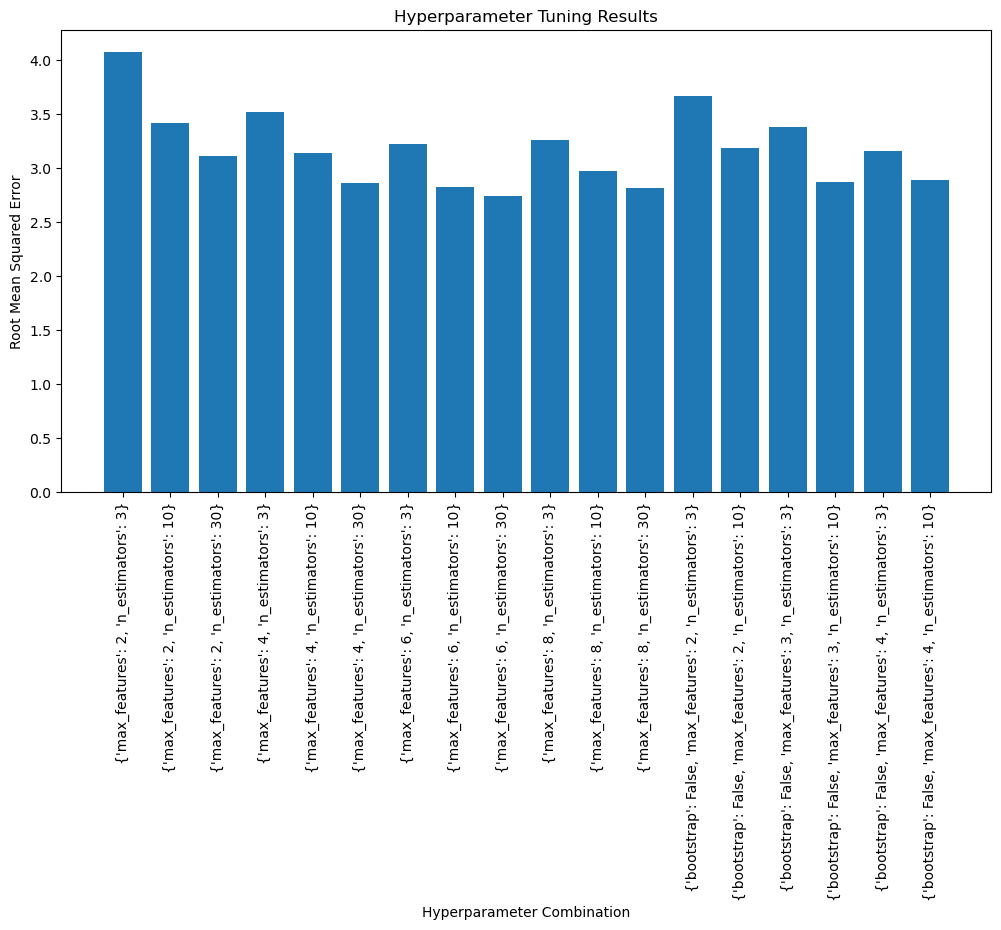

In [155]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming cvres is already defined as grid_search.cv_results_
cvres = grid_search.cv_results_

mean_scores = []
params_list = []

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    mean_scores.append(np.sqrt(-mean_score))
    params_list.append(str(params))

plt.figure(figsize=(12, 6))
plt.bar(params_list, mean_scores)
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Root Mean Squared Error')
plt.title('Hyperparameter Tuning Results')
plt.xticks(rotation=90)
plt.show()


In [156]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027060,0.005690,0.002345,0.000583,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-14.577703,-17.716403,...,-16.615207,3.373668,18,-4.041680e+00,-5.218974e+00,-3.671319e+00,-4.056280e+00,-3.631971e+00,-4.124045e+00,5.757332e-01
1,0.059120,0.005664,0.008200,0.005548,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-9.665693,-12.025777,...,-11.679817,1.317303,15,-2.119772e+00,-2.137130e+00,-2.082668e+00,-2.003589e+00,-2.214661e+00,-2.111564e+00,6.905587e-02
2,0.156167,0.011157,0.007297,0.000861,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-7.889723,-10.037713,...,-9.660962,1.198138,8,-1.520056e+00,-1.408256e+00,-1.537219e+00,-1.452597e+00,-1.611778e+00,-1.505981e+00,7.038043e-02
3,0.018812,0.002330,0.002556,0.001219,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-15.634302,-10.223294,...,-12.386697,2.448029,16,-4.344969e+00,-3.113791e+00,-3.215300e+00,-2.657368e+00,-2.841282e+00,-3.234542e+00,5.891999e-01
4,0.052379,0.008218,0.004473,0.001999,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-9.947742,-8.355518,...,-9.846519,0.790139,9,-1.863518e+00,-1.701684e+00,-1.475860e+00,-1.720008e+00,-1.608543e+00,-1.673922e+00,1.283311e-01
5,0.241327,0.026898,0.013626,0.010069,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-8.923674,-7.355441,...,-8.204102,0.521815,4,-1.387159e+00,-1.326164e+00,-1.162946e+00,-1.240876e+00,-1.066919e+00,-1.236813e+00,1.139514e-01
6,0.031790,0.013094,0.002096,0.000646,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-8.362583,-9.067936,...,-10.377242,1.536945,12,-3.297711e+00,-2.763629e+00,-3.113762e+00,-2.749083e+00,-2.460543e+00,-2.876946e+00,2.951968e-01
7,0.087814,0.008298,0.003747,0.000757,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-7.468965,-7.586939,...,-7.957375,0.429503,3,-1.558604e+00,-1.774352e+00,-1.507176e+00,-1.567686e+00,-1.509741e+00,-1.583512e+00,9.854951e-02
8,0.290161,0.065866,0.023874,0.033851,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-6.952049,-7.048658,...,-7.514565,0.684132,1,-1.173364e+00,-1.296276e+00,-1.097211e+00,-1.198559e+00,-1.164597e+00,-1.186002e+00,6.452876e-02
9,0.021067,0.003095,0.001583,0.000129,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-7.355390,-9.798410,...,-10.610695,1.937280,13,-2.826154e+00,-2.598212e+00,-3.140107e+00,-2.515084e+00,-3.171115e+00,-2.850134e+00,2.695965e-01


### c. Ridge Regression

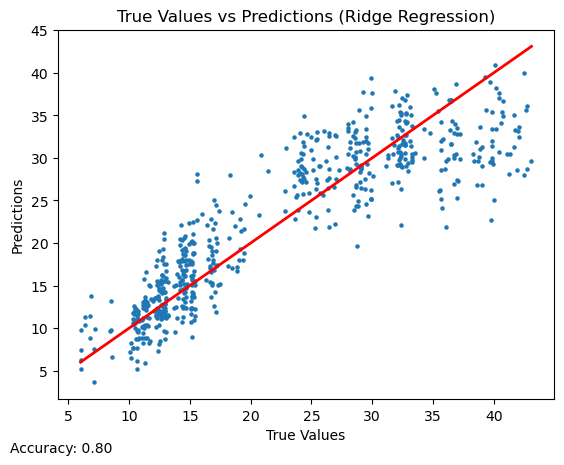

In [157]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Fit the Ridge Regression model
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(train_dataset_prepared, y_train)  # Use the correct variable for training labels

# Make predictions
predictions = ridge_reg.predict(train_dataset_prepared)

# Calculate accuracy using score() method
accuracy = ridge_reg.score(train_dataset_prepared, y_train)

# Create a scatter plot comparing true values with predicted values
plt.scatter(y_train, predictions, s=5)  # Set the marker size to a smaller value
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Ridge Regression)")

# Add a reference line for better visualization
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

# Print accuracy at the bottom of the plot
plt.text(0.05, 0, f"Accuracy: {accuracy:.2f}", fontsize=10, transform=plt.gcf().transFigure)

plt.show()


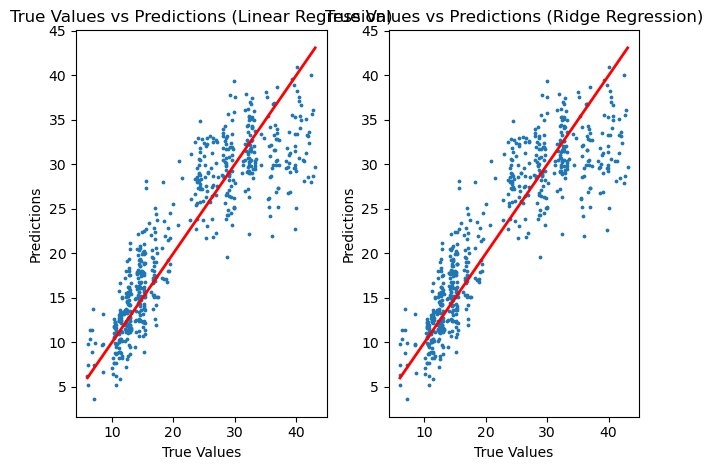

In [158]:
import matplotlib.pyplot as plt

# Fit the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(train_dataset_prepared, y_train)  # Use the correct variable for training labels

# Make predictions using the Linear Regression model
predictions_1 = lin_reg.predict(train_dataset_prepared)


# Fit the Ridge Regression model
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(train_dataset_prepared, y_train)  # Use the correct variable for training labels

# Make predictions using the Ridge Regression model
predictions_2 = ridge_reg.predict(train_dataset_prepared)


# Create a side-by-side comparison of the scatter plots
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.scatter(y_train, predictions_1, s=3) 
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Linear Regression)")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.scatter(y_train, predictions_2, s=3) 
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Ridge Regression)")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

plt.tight_layout()
plt.show()


In [159]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 60 to 102
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category of the Building   614 non-null    object 
 1   Relative Compactness       614 non-null    float64
 2   Surface Area               614 non-null    float64
 3   Wall Area                  585 non-null    float64
 4   Roof Area                  614 non-null    float64
 5   Overall Height             614 non-null    float64
 6   Orientation                614 non-null    float64
 7   Glazing Area               614 non-null    float64
 8   Glazing Area Distribution  614 non-null    float64
dtypes: float64(8), object(1)
memory usage: 64.1+ KB


### Using Stochastic Gradient Descent

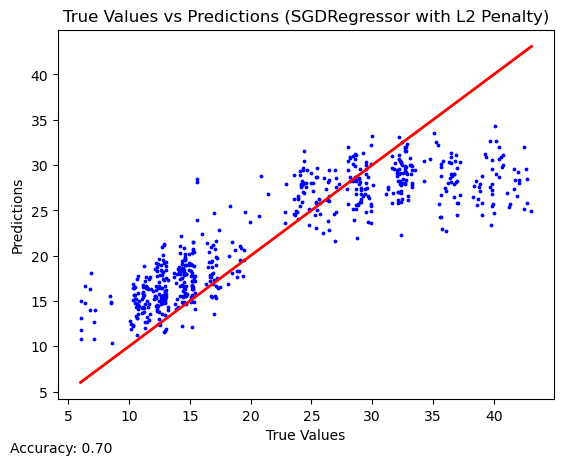

In [160]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
import pandas as pd

sgd_reg = SGDRegressor(penalty="l2", alpha=1, random_state=42)
sgd_reg.fit(train_dataset_prepared, y_train.ravel())

predictions = sgd_reg.predict(train_dataset_prepared)

# Calculate accuracy using score() method
accuracy = sgd_reg.score(train_dataset_prepared, y_train)

# Create a scatter plot comparing true values with predicted values
plt.scatter(y_train, predictions, s=3, c='blue', label='Predictions')  # Set the marker size to a smaller value and color to blue

plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (SGDRegressor with L2 Penalty)")

# Add a reference line for better visualization
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

# Print accuracy at the bottom of the plot
plt.text(0.05, 0, f"Accuracy: {accuracy:.2f}", fontsize=10, transform=plt.gcf().transFigure)

plt.show()




### d. Lasso Regression

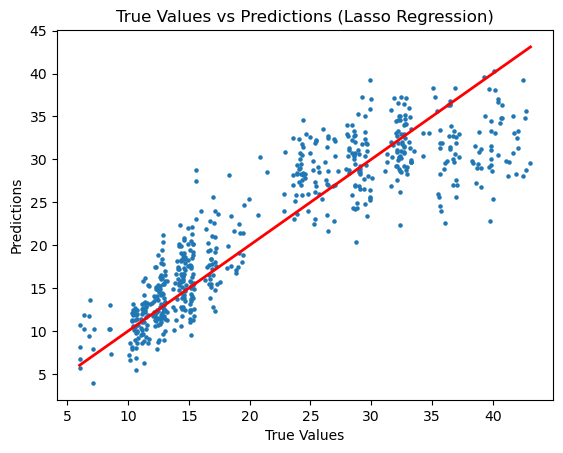

In [161]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Fit the Lasso Regression model
lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(train_dataset_prepared, y_train)

# Make predictions using the Lasso Regression model
predictions_3 = lasso_reg.predict(train_dataset_prepared)

# Create a scatter plot comparing true values with predicted values
plt.scatter(y_train, predictions_3, s=5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Lasso Regression)")

# Add a reference line for better visualization
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

plt.show()



### e. Elastic Net Regression

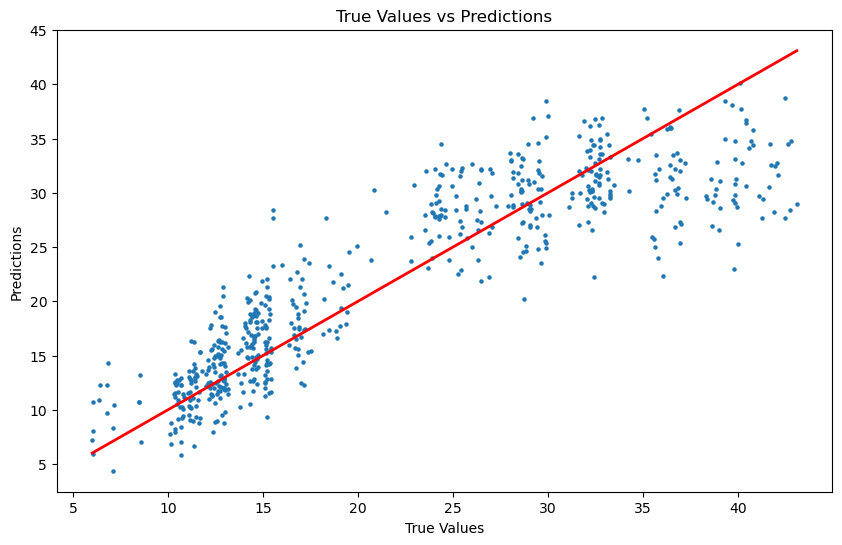

In [162]:
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt




# accuracy =  accuracy_score(test

# Fit the ElasticNet model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(train_dataset_prepared, y_train)

# Make predictions
predictions = elastic_net.predict(train_dataset_prepared)


# Create a scatter plot comparing true values with predicted values
plt.figure(figsize=(10, 6)) 
plt.scatter(y_train, predictions, s=5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")

# Add a reference line for better visualization
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

plt.show()


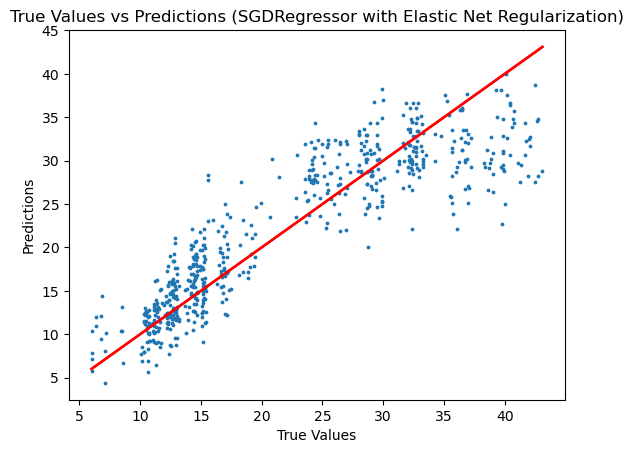

In [163]:
from sklearn.linear_model import SGDRegressor

# Create an instance of the SGDRegressor model with Elastic Net regularization
sgd_reg = SGDRegressor(penalty="elasticnet", alpha=0.1, l1_ratio=0.5, random_state=42)

# Fit the model to your training data
sgd_reg.fit( train_dataset_prepared, y_train.ravel())

# Generate predictions on your training data
predictions_5 = sgd_reg.predict( train_dataset_prepared)

# Create a scatter plot comparing true values with predicted values
plt.scatter(y_train, predictions_5, s=3) 
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (SGDRegressor with Elastic Net Regularization)")

# Add a reference line for better visualization
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

plt.show()

### Polynomial Regression with Regularisation

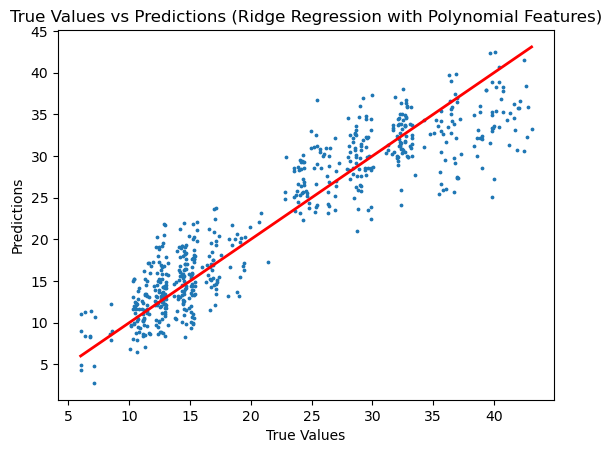

In [164]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
train_data_poly = poly_features.fit_transform(train_dataset_prepared)

# Apply regularization using Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(train_data_poly, y_train)  # Use the correct variable for training labels

# Make predictions
X_new = train_dataset_prepared
X_new_poly = poly_features.transform(X_new)  # Create new instances with polynomial features
predictions_4 = ridge_reg.predict(X_new_poly)

# Create a scatter plot comparing true values with predicted values
plt.scatter(y_train, predictions_4, s=3) 
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Ridge Regression with Polynomial Features)")

# Add a reference line for better visualization
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

plt.show()


Predictions: [25.12891367 20.66313941 31.8707719  35.85171099 11.14680255 33.19825258
 29.57014656 35.29414967 20.92819926 13.432187   18.53183871 13.94783729
 29.33124919 34.39825684 31.35033925 13.23420501  9.00581459 29.92691081
 11.75805898 31.82689815 14.31108063 31.36108915 12.13603325 16.86408382
 32.21505504 30.69613639  8.44347263 17.09825517 33.06412924 15.61570078
 33.63792273 18.03993078 27.5971298  13.48114151 16.95079693 32.26117858
 22.05258824 18.16035954 39.75193689 11.96875387 32.18897111 33.33778009
 26.9425645  12.48654439 27.83846222 11.35676112 17.08681223 31.0686436
 19.57566513 31.40310695  8.77572131 32.3474879  25.34774859 30.67624177
 27.66627758 13.51889641 31.16831218 11.7982464  15.34610285 35.09485647
  4.34520502 14.4478829  26.48584784 28.32140647 30.99263729 15.67518045
 23.35170595 12.58155518 25.61700068 35.28384298 13.1752129   9.86591054
 19.67995624 25.88340968 29.94003798 15.48826355 32.19814171 10.06397647
 14.35719723 31.26102125 36.27656762 23

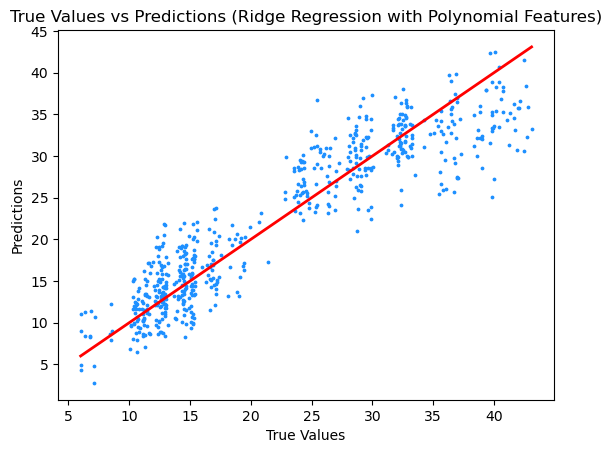

In [165]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
train_data_poly = poly_features.fit_transform(train_dataset_prepared)

# Apply regularization using Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(train_data_poly, y_train)  # Use the correct variable for training labels

# Make predictions
X_new = train_dataset_prepared
X_new_poly = poly_features.transform(X_new)  # Create new instances with polynomial features
prediction = ridge_reg.predict(X_new_poly)

print("Predictions:", prediction)

# Create a scatter plot comparing true values with predicted values
plt.scatter(y_train, prediction, s=3, c='dodgerblue', label='Predictions')  # Set the marker size to a smaller value and color to blue

plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (Ridge Regression with Polynomial Features)")

# Add a reference line for better visualization
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

plt.show()



### Neural Network

setup

In [166]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

2023-03-16 23:10:53.512904: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Perceptron

In [173]:
import numpy as np
from sklearn.linear_model import Perceptron

# Assuming train_dataset_prepared and dataset_labels are already defined as your dataset's features and target values
X = train_dataset_prepared
y_continuous = dataset_labels

# Discretize the target variable using the median value
y_median = np.median(y_continuous)
y_binary = (y_continuous > y_median).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y_binary)

# Make predictions using the same dataset used for training
y_pred = per_clf.predict(X)


In [174]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,

In [175]:
# Defining and plotting some of the most common actvation functions 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


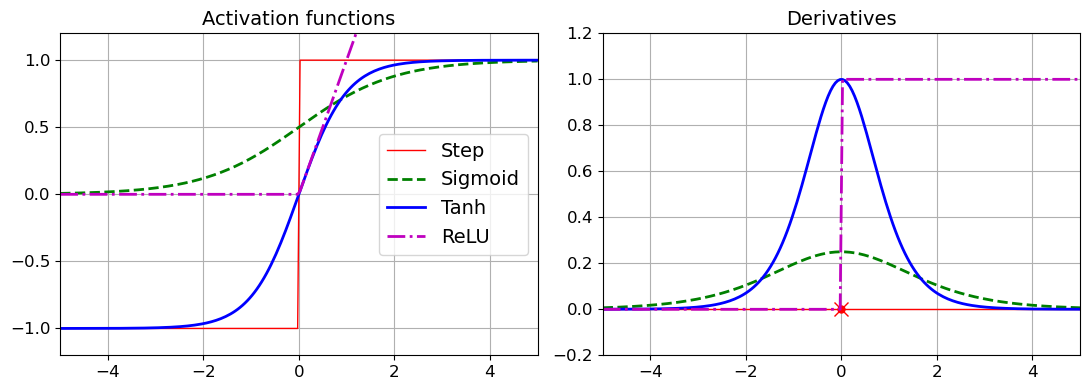

In [176]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

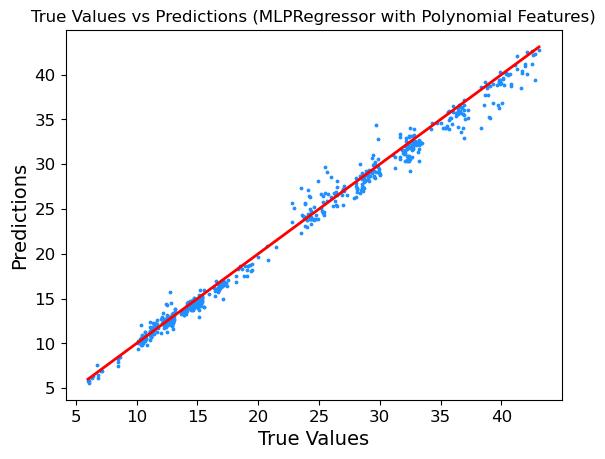

In [193]:
from sklearn.neural_network import MLPRegressor

# Define the neural network model
mlp_reg = MLPRegressor(hidden_layer_sizes=(50, 50),
                       activation='relu',
                       solver='adam',
                       alpha=0.001,
                       batch_size='auto',
                       learning_rate='constant',
                       learning_rate_init=0.001,
                       max_iter=2000,
                       random_state=42)

# Train the neural network model
mlp_reg.fit(train_data_poly, y_train)

# Make predictions
prediction = mlp_reg.predict(X_new_poly)

# Create a scatter plot comparing true values with predicted values
plt.scatter(y_train, prediction, s=3, c='dodgerblue', label='Predictions')

plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions (MLPRegressor with Polynomial Features)")

# Add a reference line for better visualization
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linewidth=2)

plt.show()


In [184]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_train, prediction))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the R-squared
r2 = r2_score(y_train, prediction)
print("R-squared:", r2)


Root Mean Squared Error (RMSE): 2.2570652107750266
R-squared: 0.949522930197333
